In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x ** 2

In [3]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [4]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')  # shape (3,2)
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]  # shape (1,3)

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y ** 2)

In [5]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [7]:
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [8]:
my_vars = {
    'w': w,
    'b': b
}
grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.9555566, -0.3094782], dtype=float32)>

In [9]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
    y = (x0 ** 2) + (x1 ** 2) + (x2 ** 2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [10]:
[var.name for var in tape.watched_variables()]

['x0:0']

In [11]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x ** 2
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [12]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
    z = y * y
# 计算 z 相对中间变量 y 的梯度
# dz_dy = 2y, y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


In [13]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())
print(tape.gradient(y, x).numpy())

[  4. 108.]
[2. 6.]


In [14]:
del tape

In [15]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y0 = x ** 2
    y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75


In [17]:
x = tf.linspace(-10.0, 10.0, 200 + 1)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)
dy_dx = tape.gradient(y, x)

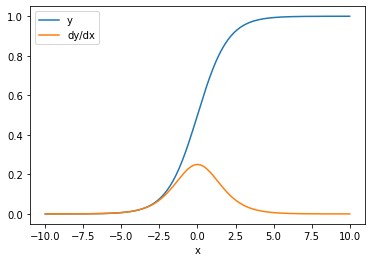

In [18]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()

_ = plt.xlabel('x')

In [19]:
x = tf.constant(10)

with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
print(g.gradient(y, x))

None
